# LIME Image Classification Research
By: Brett Huffman, [www.bretthuffman.com](https://www.bretthuffman.com)

Makes sure you are running GPU versions of Colab for these tests

In [ ]:


import numpy as np
import keras
from keras.applications.imagenet_utils import decode_predictions
import skimage.io
import skimage.segmentation
from skimage.util import crop
import copy
import sklearn
import sklearn.metrics
from sklearn.linear_model import LinearRegression
import warnings

import cv2
from matplotlib import pyplot as plt

print('Notebook running: keras ', keras.__version__)
np.random.seed(222)

In [ ]:
# LoAD InceptionV3
warnings.filterwarnings('ignore')
inceptionV3_model = keras.applications.inception_v3.InceptionV3() #Load pretrained model

96112376/96112376 [==============================] - 1s 0us/step


In [ ]:
# Different files to test
file = "https://images.unsplash.com/photo-1535941339077-2dd1c7963098?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2954&q=80"

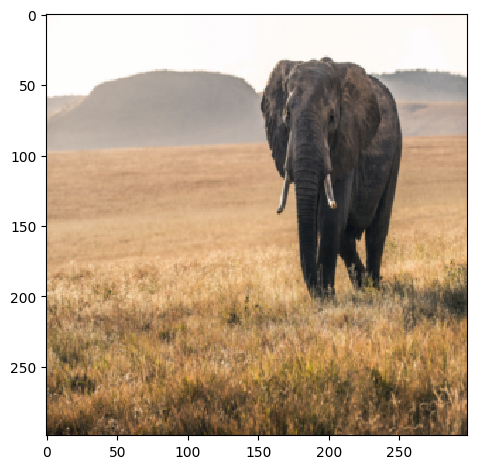

In [ ]:
Xi = skimage.io.imread(file)
Xi = skimage.transform.resize(Xi, (299,299))
Xi = (Xi - 0.5)*2 #Inception pre-processing
skimage.io.imshow(Xi/2+0.5) # Show image before inception preprocessing

In [ ]:
# Calculate Predictions
preds = inceptionV3_model.predict(Xi[np.newaxis,:,:,:])
decode_predictions(preds)[0] #Top 5 classes

1/1 [==============================] - 0s 27ms/step


[('n02504458', 'African_elephant', 0.5297617),
 ('n01871265', 'tusker', 0.36428118),
 ('n02504013', 'Indian_elephant', 0.05064556),
 ('n04033995', 'quilt', 0.00035833346),
 ('n02391049', 'zebra', 0.00033460226)]

In [ ]:
top_pred_classes = preds[0].argsort()[-5:][::-1]
top_pred_classes                #Index of top 5 classes

array([386, 101, 385, 750, 340])

In [ ]:
superpixels = skimage.segmentation.quickshift(Xi, kernel_size=4,max_dist=200, ratio=0.2)
num_superpixels = np.unique(superpixels).shape[0]
num_superpixels

67

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0])

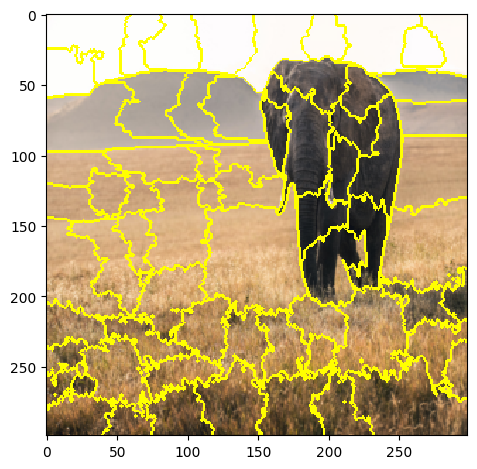

In [ ]:
# Plot superpixel regions:
skimage.io.imshow(skimage.segmentation.mark_boundaries(Xi/2+0.5, superpixels))
# Show array of example perturbations
num_perturb = 150
perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_superpixels))
perturbations[0] #Show example of perturbation

299
271
243
215
187
159
131
103
75
47


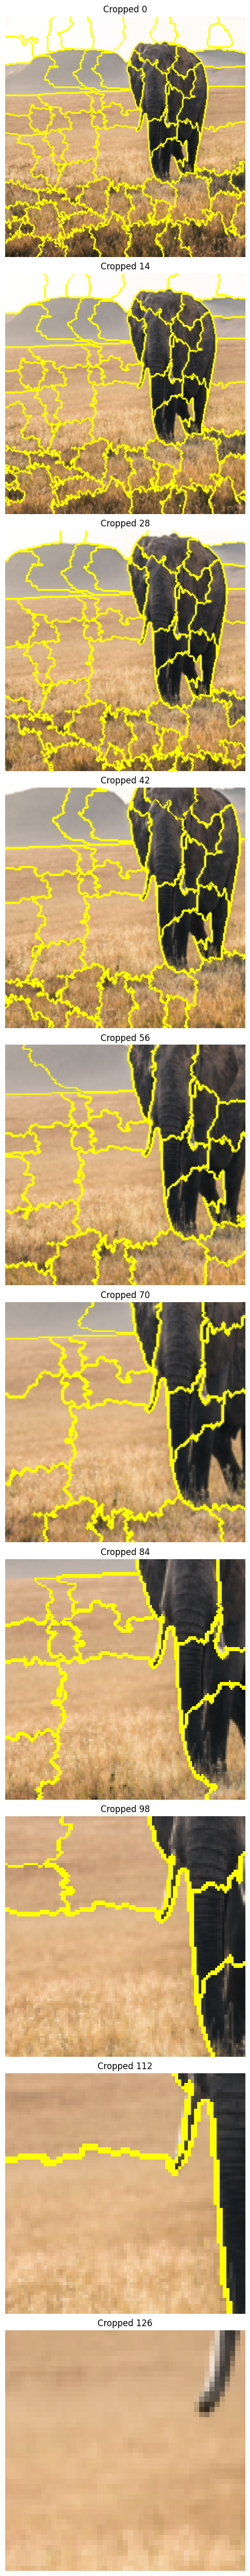

In [ ]:
# setting values to rows and column variables
rows = 10
columns = 1

fig = plt.figure( figsize=(60, 50), layout='constrained')


# showing images
crop_amount = 14
super_pixel_count = []

%timeit
for i in range(rows):
  # Crop and determine segmentation
  cropped = crop(Xi, ((crop_amount * i, crop_amount * i), (crop_amount * i, crop_amount * i), (0,0)), copy=False)
  cropped_sp = skimage.segmentation.quickshift(cropped, kernel_size=4,max_dist=200, ratio=0.2)

  print(len(cropped_sp))
  super_pixel_count.append((crop_amount * i, len(cropped_sp)))


  cropped_sp_img = skimage.segmentation.mark_boundaries(cropped/2+0.5, cropped_sp)

  # Plot them
  fig.add_subplot(rows, columns, i+1)
  plt.axis('off')
  plt.title('Cropped '+str(i*crop_amount))
  plt.imshow(cropped_sp_img)

plt.show()


[(0, 299), (14, 271), (28, 243), (42, 215), (56, 187), (70, 159), (84, 131), (98, 103), (112, 75), (126, 47)]


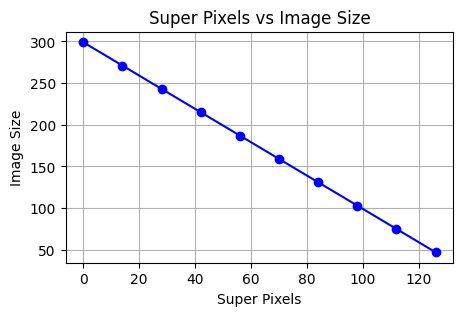

In [ ]:
#Now, plot the number of Super Pixels compared to size
print(super_pixel_count)
# Split the data into x and y coordinates
x, y = zip(*super_pixel_count)

# Plotting
plt.figure(figsize=(5, 3))
plt.plot(x, y, marker='o', color='b', label='_Data')
plt.title('Super Pixels vs Image Size')
plt.xlabel('Super Pixels')
plt.ylabel('Image Size')
plt.grid(True)

# Display the plot
plt.show()